In [35]:
#importing libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


In [36]:
#importing dataset
df = pd.read_csv('C:/Users/satha/Desktop/Mall_Customers_data')

In [37]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [38]:
#Understanding our dataset
df.shape

(200, 5)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [40]:
X = df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [41]:
#performing elbow method to find the optimal no.of clusters
wcss=[]

In [42]:
for i in range(1, 11):
    Kmeans = KMeans(n_clusters =i, init = 'k-means++', random_state = 0)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)


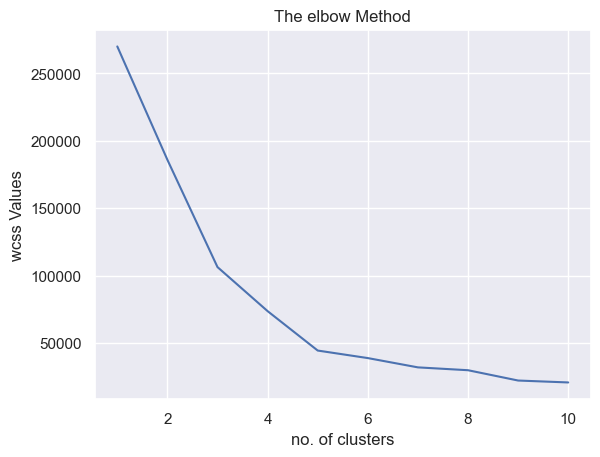

In [43]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The elbow Method')
plt.xlabel('no. of clusters')
plt.ylabel('wcss Values')
plt.show()

In [44]:
#Hence, the optimum number of clusters = 5

In [45]:
kmeans_model = KMeans(n_clusters=5, init='k-means++', random_state=0)

In [46]:
y_kmeans = kmeans_model.fit_predict(X)
y_kmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

<function matplotlib.pyplot.show(close=None, block=None)>

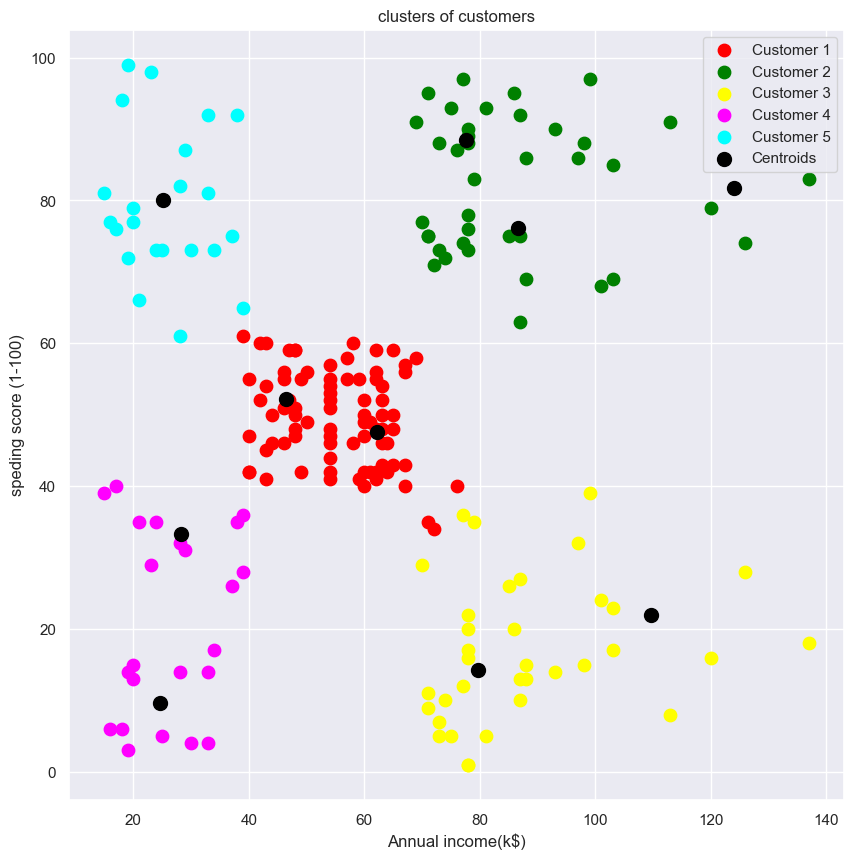

In [47]:
plt.figure(figsize=(10,10))
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s= 80, c='red', label = 'Customer 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s= 80, c='green', label = 'Customer 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s= 80, c='yellow', label = 'Customer 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s= 80, c='magenta', label = 'Customer 4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s= 80, c='cyan', label = 'Customer 5')
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')
plt.title('clusters of customers')
plt.xlabel('Annual income(k$)')
plt.ylabel('speding score (1-100)')
plt.legend()
plt.show